# Critical Exponent Fit

In this notebook we fit power law to our transient lifetime means.

## Imports

In [1]:
# Assume we're running from project root
%cd .. 

/Users/cfn18/Documents/PhD-Work/Thesis-Computing/Determinisitc/l96_ebm_boundary_crisis


In [2]:
# Local imports
from src.transient_lifetimes import TransientLifetimeResult

# Other imports
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

## Plot/Data Locations

In [3]:
# plot_pd = Path('plots')
plot_pd = Path('/Users/cfn18/Documents/PhD-Work/Thesis/img/Tipping-Points/')
data_pd = Path('data')
config_pd = Path('cfg')

## Critical Exponent Fit

In [19]:
# Load lifetime data

csv_file = data_pd/'transient_lifetime_130723_BIG.csv'
df = pd.read_csv(csv_file)

sb_lifetimes = TransientLifetimeResult(df, 'sb')
w_lifetimes = TransientLifetimeResult(df, 'w')

/Users/cfn18/Documents/PhD-Work/Thesis-Computing/Determinisitc/l96_ebm_boundary_crisis/src/transient_lifetimes.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df.dropna(inplace=True)


RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.

(<Figure size 401.569x248.183 with 1 Axes>,
 <AxesSubplot:title={'center':'$S_c = 14.67\\pm0.69$, $\\gamma = 6.33\\pm9.78$'}, xlabel='$\\log(|S - S_c|)$', ylabel='$\\log(\\tau)$'>)

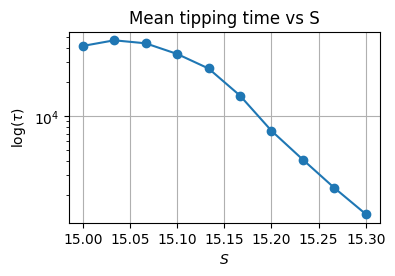

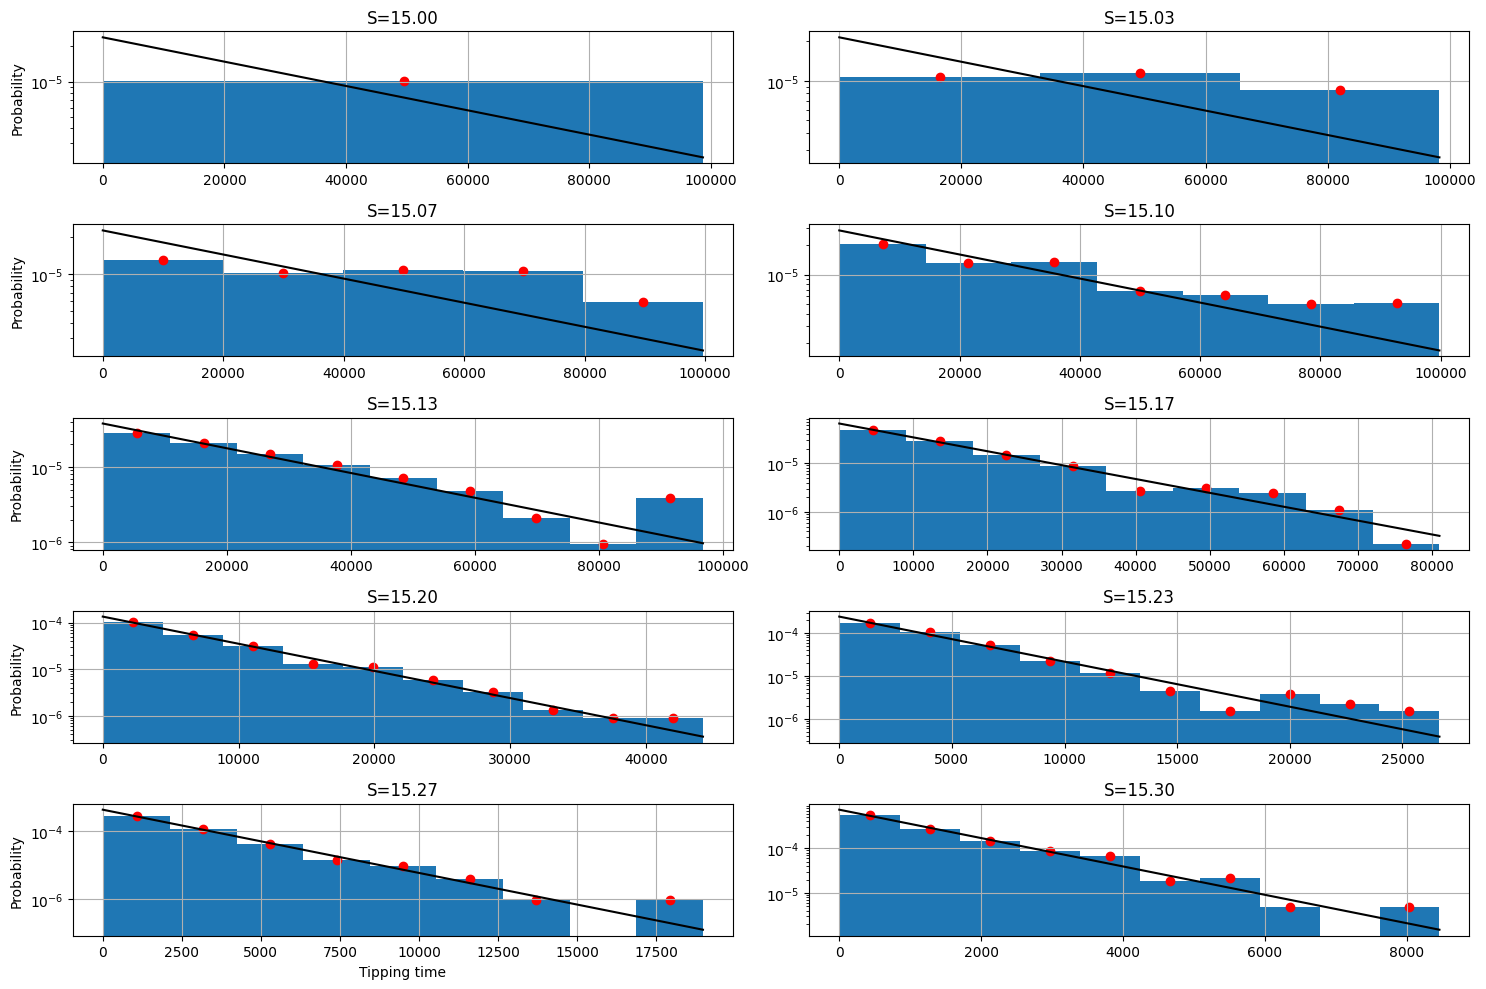

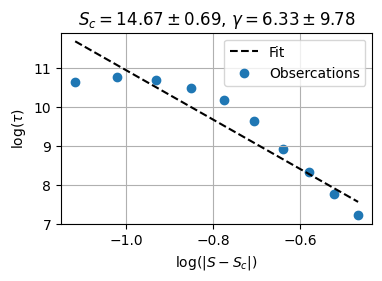

In [ ]:
sb_lifetimes.plot_mean_tipping_time()
sb_lifetimes.all_tipping_time_histograms()
sb_lifetimes.plot_scaling_lawfit()

(<Figure size 401.569x248.183 with 1 Axes>,
 <AxesSubplot:title={'center':'$S_c = 7.90\\pm0.02$, $\\gamma = 5.90\\pm0.64$'}, xlabel='$\\log(|S - S_c|)$', ylabel='$\\log(\\tau)$'>)

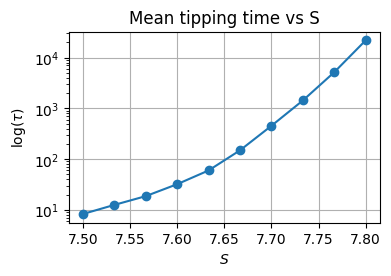

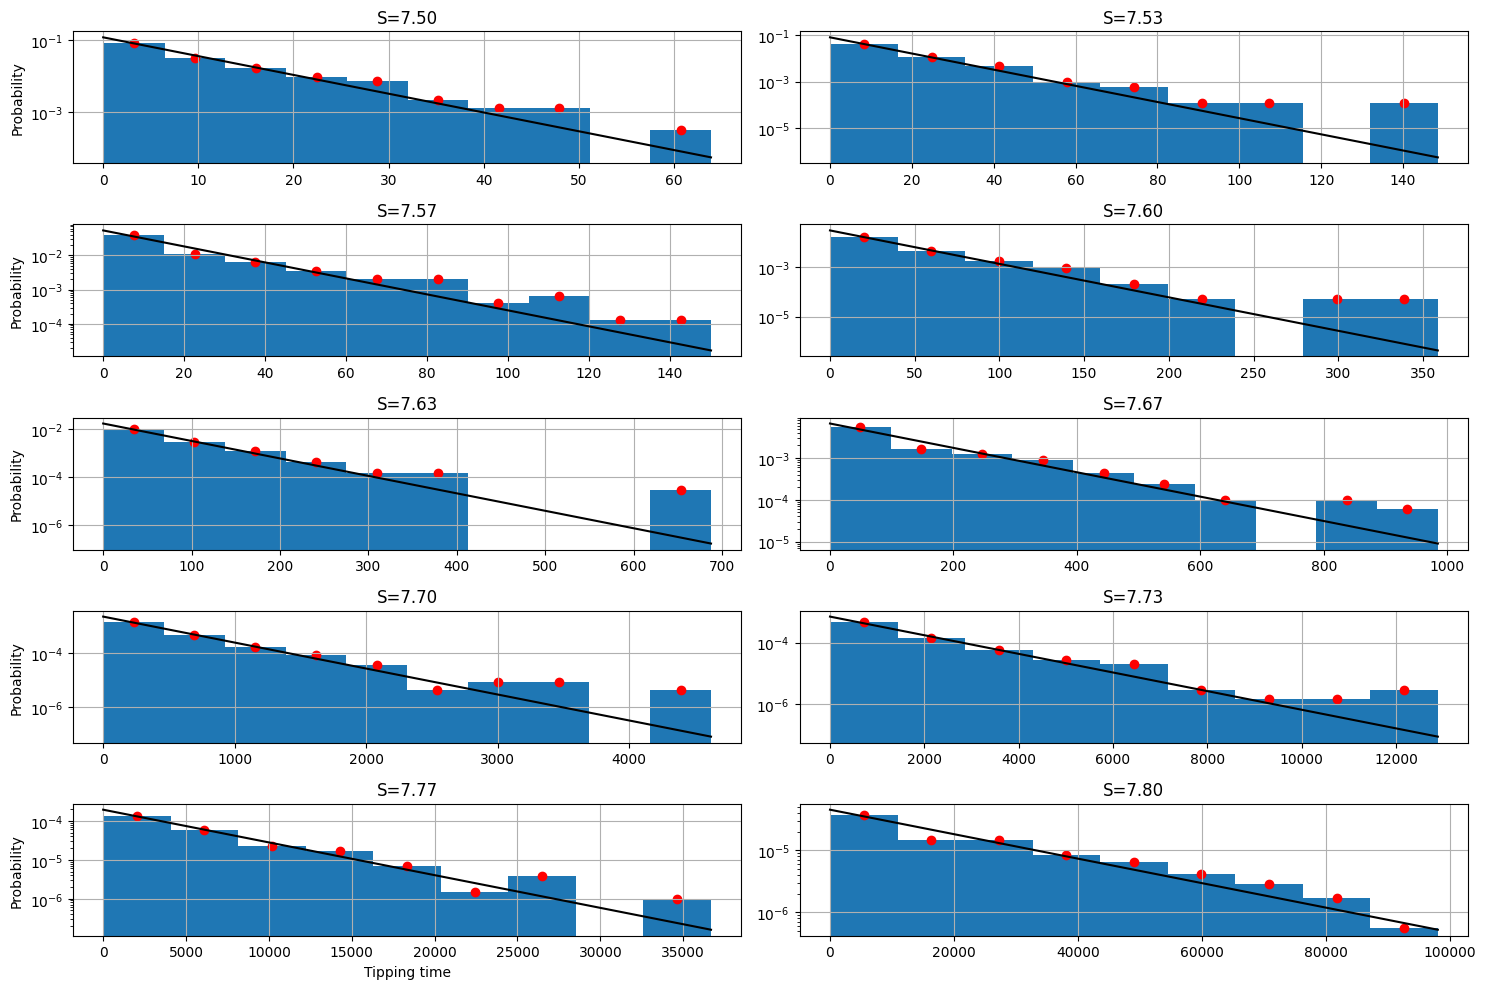

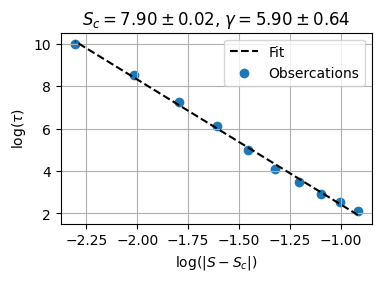

In [20]:
w_lifetimes.plot_mean_tipping_time()
w_lifetimes.all_tipping_time_histograms()
w_lifetimes.plot_scaling_lawfit()

# Print Results in Latex

In [7]:
# latex_ds = SBTransientLifetimes.mean_lifetimes()[5:].sort_values('distance_from_crit')
# latex_ds['S'] = latex_ds.index
# print(latex_ds[['S', 'distance_from_crit', 'mean_tipping_time', 'sample_size', 'standard_error']].round(decimals=2).to_latex(index=False))
# latex_ds.columns

NameError: name 'SBTransientLifetimes' is not defined